In [1]:
%matplotlib inline

# Lecture 4: Queries and GroupBy

In [2]:
import babypandas as bpd

# NBA Salaries

- The file `nba_salaries.csv` contains all salaries from 2015-2016 NBA season.

In [3]:
salaries = bpd.read_csv('data/nba_salaries.csv').set_index('PLAYER')
salaries

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Gary Neal,PG,Washington Wizards,2.139000
DeJuan Blair,C,Washington Wizards,2.000000
Kelly Oubre Jr.,SF,Washington Wizards,1.920240


## Questions we can answer:

- What was the biggest salary?
- How many players were there?
- What was LeBron James' salary?
- *Who* had the biggest salary?

## Questions we'll learn how to answer today:

- Who was the highest paid center?
- What is the total payroll of the Cleveland Cavaliers?
- What team had the largest combined salary?

# Selecting Rows

## Use Case: Who was the highest paid center (C)?

In [4]:
salaries

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Gary Neal,PG,Washington Wizards,2.139000
DeJuan Blair,C,Washington Wizards,2.000000
Kelly Oubre Jr.,SF,Washington Wizards,1.920240


## Selecting Rows

- We could do it if we had a table consisting only of centers.
- But how do we get that table?

## The Solution

In [5]:
salaries[salaries.get('POSITION') == 'C']

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Walter Tavares,C,Atlanta Hawks,1.000000
Tyler Zeller,C,Boston Celtics,2.616975
Jared Sullinger,C,Boston Celtics,2.569260
...,...,...,...
Rudy Gobert,C,Utah Jazz,1.175880
Jeff Withey,C,Utah Jazz,0.947276
Nene Hilario,C,Washington Wizards,13.000000


In [6]:
'PG' == 'C'

False

In [7]:
'C' == 'C'

True

In [8]:
salaries.get('POSITION') == 'C'

PLAYER
Paul Millsap       False
Al Horford          True
Tiago Splitter      True
Jeff Teague        False
Kyle Korver        False
                   ...  
Gary Neal          False
DeJuan Blair        True
Kelly Oubre Jr.    False
Garrett Temple     False
Jarell Eddie       False
Name: POSITION, Length: 417, dtype: bool

## Boolean Indexing

To select only some rows of `salaries`:

1. Make a list/array/Series of `True`s (keep) and `Falses` (toss)
2. Then pass it into `salaries[]`.

Rather than making the list by hand, we usually make comparisons.

## Elementwise comparisons work as expected

In [9]:
salaries.get('2015_SALARY') > 5

PLAYER
Paul Millsap        True
Al Horford          True
Tiago Splitter      True
Jeff Teague         True
Kyle Korver         True
                   ...  
Gary Neal          False
DeJuan Blair       False
Kelly Oubre Jr.    False
Garrett Temple     False
Jarell Eddie       False
Name: 2015_SALARY, Length: 417, dtype: bool

In [10]:
#- make a table with only players who made more than 5 million
salaries[salaries.get('2015_SALARY') > 5] # SOLUTION NO PROMPT

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Nene Hilario,C,Washington Wizards,13.000000
Marcin Gortat,C,Washington Wizards,11.217391
Markieff Morris,PF,Washington Wizards,8.000000


## Another example

In [11]:
#- get only the Cleveland Cavaliers
salaries[salaries.get('TEAM') == 'Cleveland Cavaliers'] # SOLUTION NO PROMPT

,POSITION,TEAM,2015_SALARY
PLAYER,,,
LeBron James,SF,Cleveland Cavaliers,22.970500
Kevin Love,PF,Cleveland Cavaliers,19.689000
Kyrie Irving,PG,Cleveland Cavaliers,16.407501
Tristan Thompson,C,Cleveland Cavaliers,14.260870
Brendan Haywood,C,Cleveland Cavaliers,10.522500
Iman Shumpert,SG,Cleveland Cavaliers,8.988765
Timofey Mozgov,C,Cleveland Cavaliers,4.950000
Mo Williams,PG,Cleveland Cavaliers,2.100000
Sasha Kaun,C,Cleveland Cavaliers,1.276000


## When the conditions are not satisfied

In [12]:
salaries[salaries.get('TEAM') == 'San Diego Surfers']

,POSITION,TEAM,2015_SALARY
PLAYER,,,


## Use Case: Who was the highest paid center?

1. Extract a table of centers
2. Sort by salary
3. Return first thing in index

In [13]:
#- extract a table of centers
centers = salaries[salaries.get('POSITION') == 'C'] # SOLUTION
centers

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Walter Tavares,C,Atlanta Hawks,1.000000
Tyler Zeller,C,Boston Celtics,2.616975
Jared Sullinger,C,Boston Celtics,2.569260
...,...,...,...
Rudy Gobert,C,Utah Jazz,1.175880
Jeff Withey,C,Utah Jazz,0.947276
Nene Hilario,C,Washington Wizards,13.000000


In [14]:
#- sort and return first thing in index
centers.sort_values(by='2015_SALARY', ascending=False).index[0] # SOLUTION NO PROMPT

'Dwight Howard'

## Discussion Question

What was the total payroll of the Cleveland Cavaliers?

- a) `salaries[salaries.get('TEAM') == 'Cleveland Cavaliers'].get('2015_SALARY').sum()`
- b) `salaries.get('2015_SALARY').sum()[salaries.get('TEAM') == 'Cleveland Cavaliers']`
- c) `salaries['Cleveland Cavaliers'].get('2015_SALARY').sum()`

## Answer: a)

In [15]:
cavs = salaries[salaries.get('TEAM') == 'Cleveland Cavaliers'] # SOLUTION
cavs

,POSITION,TEAM,2015_SALARY
PLAYER,,,
LeBron James,SF,Cleveland Cavaliers,22.970500
Kevin Love,PF,Cleveland Cavaliers,19.689000
Kyrie Irving,PG,Cleveland Cavaliers,16.407501
Tristan Thompson,C,Cleveland Cavaliers,14.260870
Brendan Haywood,C,Cleveland Cavaliers,10.522500
Iman Shumpert,SG,Cleveland Cavaliers,8.988765
Timofey Mozgov,C,Cleveland Cavaliers,4.950000
Mo Williams,PG,Cleveland Cavaliers,2.100000
Sasha Kaun,C,Cleveland Cavaliers,1.276000


In [16]:
#- use series method .sum()
cavs.get('2015_SALARY').sum()

102.31241200000001

# GroupBy

## Use Case: What team had the highest payroll?

- We can find the payroll for one team.
- But how can we find the payroll for *all* teams at once?
- Can we somehow group the rows of the table by team name?

In [17]:
salaries

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Gary Neal,PG,Washington Wizards,2.139000
DeJuan Blair,C,Washington Wizards,2.000000
Kelly Oubre Jr.,SF,Washington Wizards,1.920240


## `.groupby`


In [18]:
salaries.groupby('TEAM').sum()

,2015_SALARY
TEAM,
Atlanta Hawks,69.573103
Boston Celtics,50.285499
Brooklyn Nets,57.306976
Charlotte Hornets,84.102397
Chicago Bulls,78.820890
...,...
Sacramento Kings,68.384890
San Antonio Spurs,84.652074
Toronto Raptors,74.672620


## `.groupby`

1. Use `.groupby(column_name)` to gather rows which have the same value in the column
2. Apply an *aggregation* function *within* each group

The aggregation is applied to each column.

Some aggregation functions: `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()`, `.min()`

In [19]:
salaries

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Gary Neal,PG,Washington Wizards,2.139000
DeJuan Blair,C,Washington Wizards,2.000000
Kelly Oubre Jr.,SF,Washington Wizards,1.920240


## Interesting thing # 1

- The index has changed to team names.
- In general, the new row labels are the *group labels* (the thing that is used to determine if two rows were in same group).

In [20]:
salaries.groupby('TEAM').sum()

,2015_SALARY
TEAM,
Atlanta Hawks,69.573103
Boston Celtics,50.285499
Brooklyn Nets,57.306976
Charlotte Hornets,84.102397
Chicago Bulls,78.820890
...,...
Sacramento Kings,68.384890
San Antonio Spurs,84.652074
Toronto Raptors,74.672620


## Interesting thing #2

- The `POSITION` and `TEAM` columns have disappeared. Why?

In [21]:
salaries.groupby('TEAM').sum()

,2015_SALARY
TEAM,
Atlanta Hawks,69.573103
Boston Celtics,50.285499
Brooklyn Nets,57.306976
Charlotte Hornets,84.102397
Chicago Bulls,78.820890
...,...
Sacramento Kings,68.384890
San Antonio Spurs,84.652074
Toronto Raptors,74.672620


## Disappearing columns

- The aggregation function is applied to each column.
- If it doesn't make sense to apply it to a particular column, that column will disappear.
- Example: can't sum strings, like in `POSITION` column.
- Surprising example: *can* `max()` strings (alphabetically last)

In [22]:
salaries.groupby('TEAM').max()

,POSITION,2015_SALARY
TEAM,,
Atlanta Hawks,SG,18.671659
Boston Celtics,SG,7.730337
Brooklyn Nets,SG,24.894863
Charlotte Hornets,SG,13.500000
Chicago Bulls,SG,20.093064
...,...,...
Sacramento Kings,SG,15.851950
San Antonio Spurs,SG,19.689000
Toronto Raptors,SG,13.600000


## Use Case: What team has the highest payroll?

1. Group by team.
2. Within each group, compute total salary.
3. Sort by salary, descending order.
4. Take the name of the first team.

In [23]:
#- group, sum, sort, index
salaries.groupby('TEAM').sum().sort_values('2015_SALARY', ascending=False).index[0] # SOLUTION NO PROMPT

'Cleveland Cavaliers'

## Use Case: How many players play each position?

In [24]:
#- group, count
each_position = salaries.groupby('POSITION').count() # SOLUTION
each_position

,TEAM,2015_SALARY
POSITION,,
C,69,69
PF,85,85
PG,85,85
SF,82,82
SG,96,96


## Better column names?

To rename a column

1. Add a new column with `.assign`
2. Drop the old column(s) with `.drop(by=list_of_column_labels)`

In [25]:
counts = each_position.assign(COUNT=each_position.get('TEAM')) # SOLUTION
counts

,TEAM,2015_SALARY,COUNT
POSITION,,,
C,69,69,69
PF,85,85,85
PG,85,85,85
SF,82,82,82
SG,96,96,96


In [26]:
counts.drop(columns=['TEAM', '2015_SALARY'])

,COUNT
POSITION,
C,69
PF,85
PG,85
SF,82
SG,96


# IMDB

In [27]:
imdb = bpd.read_csv('data/imdb.csv').set_index('Title')
imdb

,Votes,Rating,Year,Decade
Title,,,,
M,88355,8.4,1931,1930
Singin' in the Rain,132823,8.3,1952,1950
All About Eve,74178,8.3,1950,1950
Léon,635139,8.6,1994,1990
The Elephant Man,145514,8.2,1980,1980
...,...,...,...,...
Forrest Gump,1078416,8.7,1994,1990
Le salaire de la peur,31003,8.1,1953,1950
3 Idiots,167076,8.2,2009,2000


## What was the highest rated movie of the 1990's?

In [28]:
#- group or select?
imdb[imdb.get('Decade') == 1990].sort_values('Rating').index[-1] # SOLUTION NO PROMPT

'The Shawshank Redemption'

## How many movies appear from each decade?

In [29]:
imdb.groupby('Decade').count() # SOLUTION NO PROMPT

,Votes,Rating,Year
Decade,,,
1920,4,4,4
1930,7,7,7
1940,14,14,14
1950,30,30,30
1960,22,22,22
1970,21,21,21
1980,31,31,31
1990,42,42,42
2000,50,50,50


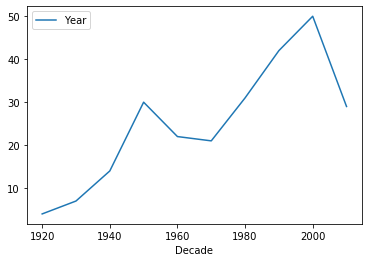

In [30]:
imdb.groupby('Decade').count().plot(y='Year')

# Combining queries and groupby

### a.k.a, more challenging problems

## How many years have more than 3 movies rated above 8.5?

In [31]:
# BEGIN SOLUTION
good_movies_per_year = imdb[imdb.get('Rating') > 8.5].groupby('Year').count()
good_movies_per_year[good_movies_per_year.get('Votes') > 3].shape[0]
# END SOLUTION

1

## Using `.sum()` on a boolean array

In [32]:
# BEGIN SOLUTION
(good_movies_per_year.get('Votes') > 3).sum()
# END SOLUTION

1

## Out of the years with more than 3 movies, which had the highest average rating?

In [33]:
# BEGIN SOLUTION
more_than_3_ix = imdb.groupby('Year').count().get('Votes') > 3
imdb.groupby('Year').mean()[more_than_3_ix].sort_values(by='Rating').index[-1]
# END SOLUTION

1994

## Which year had the longest movie titles, on average?

In [34]:
# BEGIN SOLUTION
(
    imdb.assign(title_length=imdb.index.str.len())
    .groupby('Year').mean()
    .sort_values(by='title_length')
    .index[-1]
)
# END SOLUTION

1964

In [35]:
imdb[imdb.get('Year') == 1964] # SOLUTION NO PROMPT

,Votes,Rating,Year,Decade
Title,,,,
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb,309141,8.5,1964,1960
Per un pugno di dollari,124671,8.0,1964,1960


## What is the average rating of movies from years that had at least 3 movies in the list?